Acquire power data from this source for at least 10 days and not more than 40 days. The website limits the window size, so you will need to download multiple files. Load the data into a Jupyter Notebook. Combine the multiple input files to create a single dataframe.

Create two bar graphs of the power consumption per hour.

One bar graph has 24 bars; each bar is the average across all days for that hour
one bar graph has 24*(number of days) bars. Your choice of average or sum for each hour. Label the y-axis appropriately.

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.1.1'

Loading the datasets

In [3]:
df1 = pd.read_csv("second.csv",index_col=False,skiprows=1,skipfooter=1, engine='python',header=None)
df1.head()

,0,1,2
0,VD,20200308000000,23316
1,VD,20200308000500,23654
2,VD,20200308001000,23838
3,VD,20200308001500,23986
4,VD,20200308002000,24105


In [4]:
df2 = pd.read_csv("first.csv",index_col=False,skiprows=1,skipfooter=1, engine='python',header=None)
df2.head()

,0,1,2
0,VD,20200301000000,25865
1,VD,20200301000500,25977
2,VD,20200301001000,25987
3,VD,20200301001500,26005
4,VD,20200301002000,25989


https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html 
with help of this link we merge 2 dataframes

In [5]:
df1 = pd.concat([df1,df2])
df1.index=range(len(df1))
df1.head()

,0,1,2
0,VD,20200308000000,23316
1,VD,20200308000500,23654
2,VD,20200308001000,23838
3,VD,20200308001500,23986
4,VD,20200308002000,24105


columns rename

In [6]:
df1.columns=['VD','time of measurement','demand level']

In [7]:
df1.head()

,VD,time of measurement,demand level
0,VD,20200308000000,23316
1,VD,20200308000500,23654
2,VD,20200308001000,23838
3,VD,20200308001500,23986
4,VD,20200308002000,24105


format of time

In [8]:
df1['time of measurement']=pd.to_datetime(df1['time of measurement'].astype(str),format='%Y%m%d%H%M%S')
df1

,VD,time of measurement,demand level
0,VD,2020-03-08 00:00:00,23316
1,VD,2020-03-08 00:05:00,23654
2,VD,2020-03-08 00:10:00,23838
3,VD,2020-03-08 00:15:00,23986
4,VD,2020-03-08 00:20:00,24105
...,...,...,...
3718,VD,2020-03-07 23:35:00,23838
3719,VD,2020-03-07 23:40:00,23706
3720,VD,2020-03-07 23:45:00,23615
3721,VD,2020-03-07 23:50:00,23509


Extracting the hour from the "time of measurement" field and storing it as a column in the dataframe df1

In [9]:
hour=[]
for i in range(len(df1)):
    hour.append(df1["time of measurement"][i].hour)

In [10]:
df1['hour']=hour

In [11]:
df1

,VD,time of measurement,demand level,hour
0,VD,2020-03-08 00:00:00,23316,0
1,VD,2020-03-08 00:05:00,23654,0
2,VD,2020-03-08 00:10:00,23838,0
3,VD,2020-03-08 00:15:00,23986,0
4,VD,2020-03-08 00:20:00,24105,0
...,...,...,...,...
3718,VD,2020-03-07 23:35:00,23838,23
3719,VD,2020-03-07 23:40:00,23706,23
3720,VD,2020-03-07 23:45:00,23615,23
3721,VD,2020-03-07 23:50:00,23509,23


Graph showing the Average Power Consumed all days for that hour

In [12]:
x=df1.groupby('hour')
y=x['demand level'].mean()

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

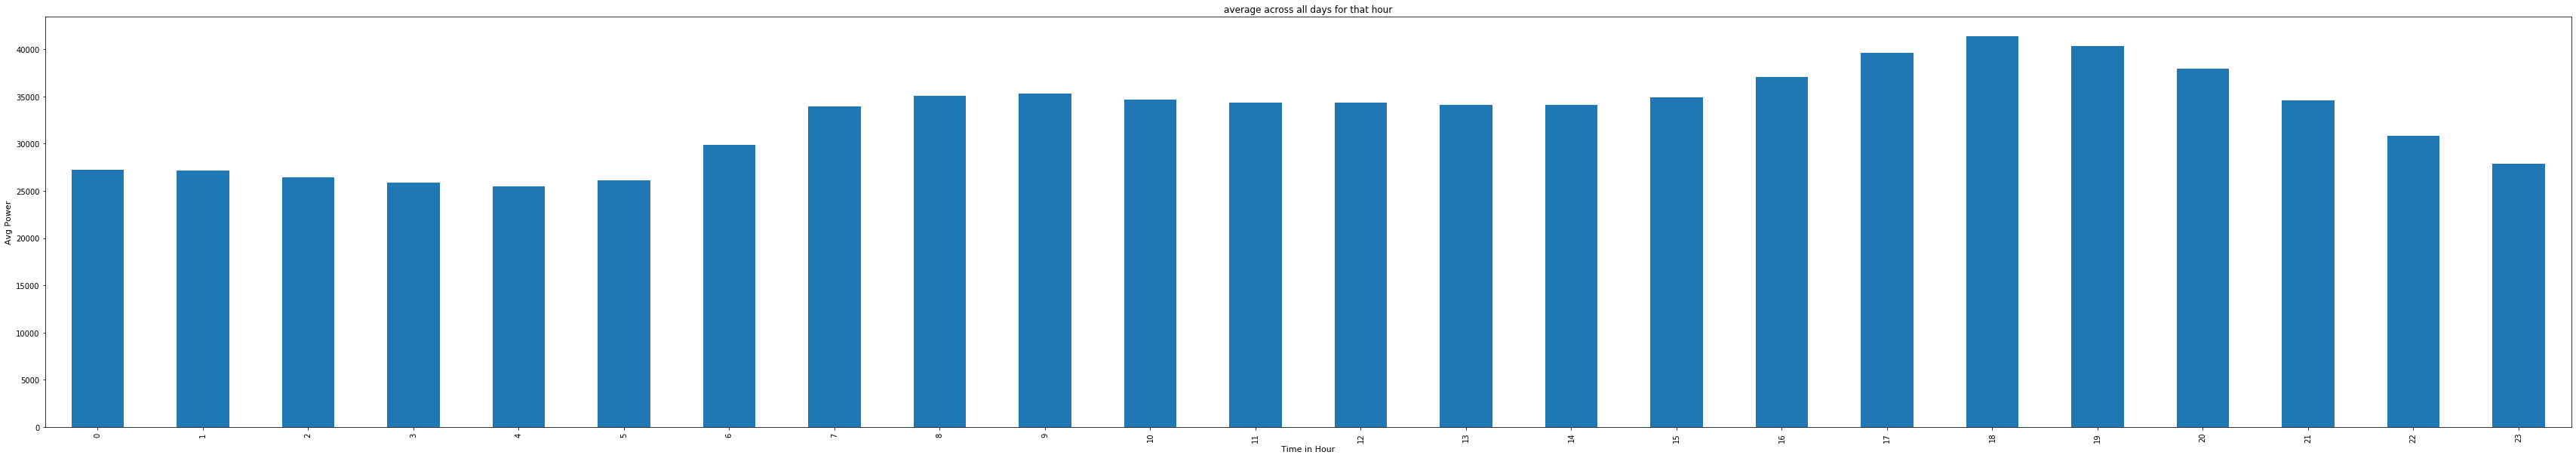

In [25]:

_=y.plot(x="hour", y="demand level",kind="bar")
_=plt.ylabel('Avg Power',fontsize=11)
_=plt.xlabel('Time in Hour',fontsize=11)
_=plt.title('average across all days for that hour')

https://www.programiz.com/python-programming/datetime/current-datetime 
this contain the code to get only date from "time of measurement" field

In [15]:
date=[]
for i in range(len(df1)):
    date.append(df1["time of measurement"][i].strftime("%d/%m/%Y"))

saving that date as a Column in "df1" Dataframe

In [16]:
df1['date']=date

generating a graph for the avg power consumtion for each day, at that particular hour

Calulating the mean for the power consumption in a day at particular hour

In [17]:
a=df1.groupby(['date','hour'])
b=a['demand level'].mean()

In [18]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 60
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Generating the graph (Double click the graph to zoom in)

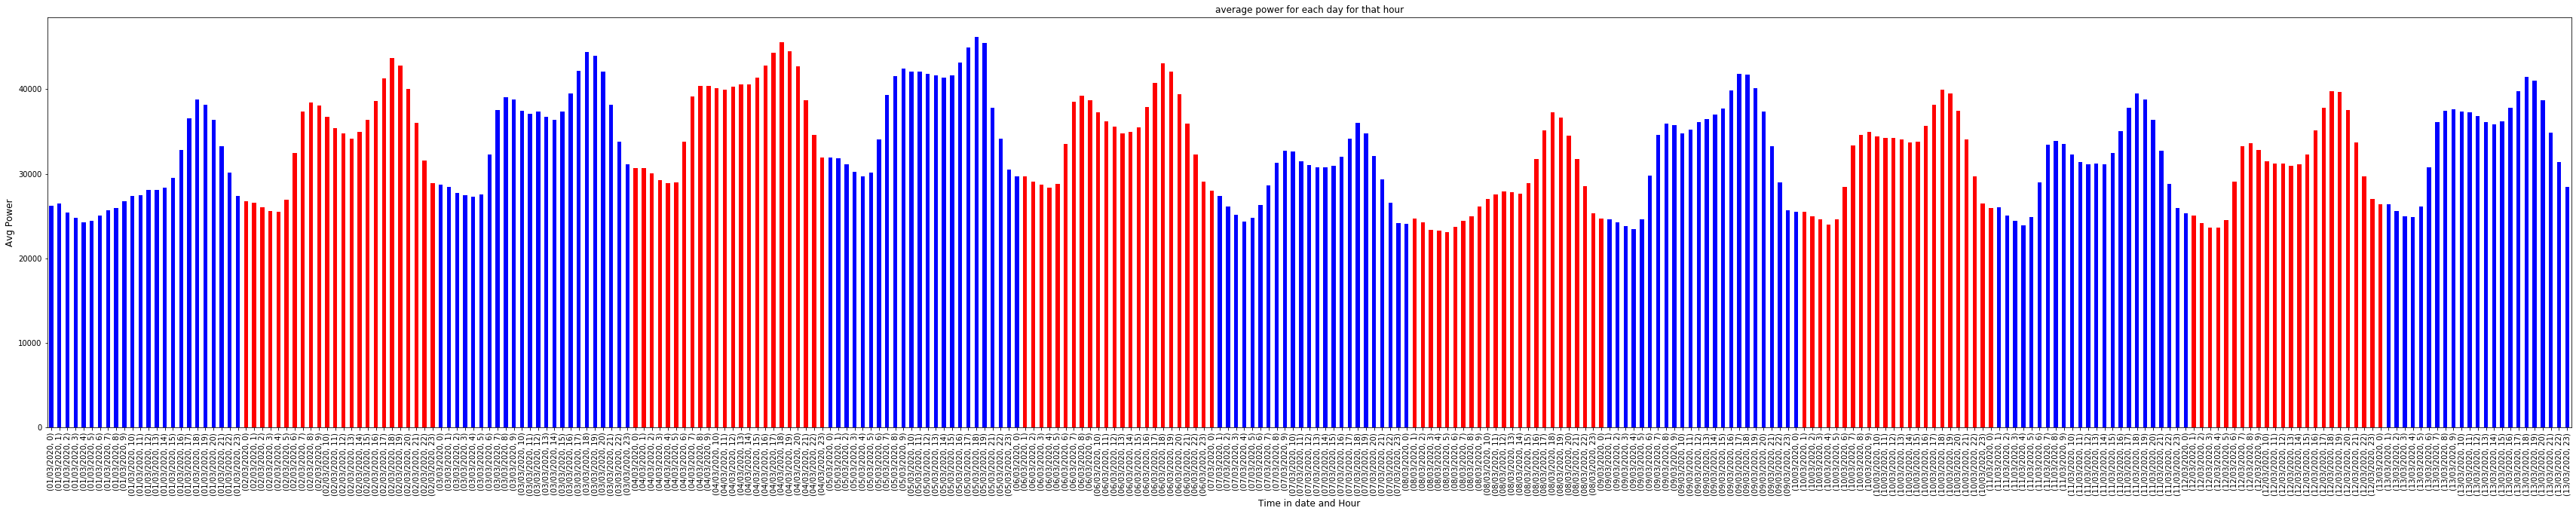

In [19]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r','r']), None, len(b)))
_=b.plot(x=["date","hour"], y="demand level",kind="bar",color=my_colors)
_=plt.ylabel('Avg Power',fontsize=12)
_=plt.xlabel('Time in date and Hour',fontsize=12)
_=plt.title('average power for each day for that hour')